#Miguel Suarez

In [2]:
#@title Importing the necessary libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.regularizers import L2
import seaborn as sns
import time



In [3]:
#@title Loading the MNIST dataset

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()



4422102/4422102 [==============================] - 1s 0us/step


In [4]:
#@title Preprocessing the images to the right pixel value
# Normalize the pixel values to a range of 0 to 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [12]:
#@title Build a neural network with the appropriate layers and nodes
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Flatten the 28x28 input images
    keras.layers.Dense(128, activation='relu'),   # Fully connected layer with ReLU activation
    keras.layers.Dropout(0.4),                   # Dropout layer to reduce overfitting
    keras.layers.Dense(64, activation='relu'),   # Additional hidden layer
    keras.layers.Dropout(0.2),                   # Another dropout layer to reduce overfitting
    keras.layers.Dense(10, activation='linear')  # Output layer with 10 units (1 for each digit)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['sparse_categorical_accuracy'])



In [13]:
#@title Train the Neural Network
# Creating a callback to stop training early if the validation loss function does not improve
early_stopping_callback = keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)

# Starting a timer
start_time = time.time()

# Training the model with validation data
history = model.fit(
    x_train, y_train, epochs=25, validation_split=0.2,
    callbacks=[early_stopping_callback]
)

# Stopping the timer
end_time = time.time()

# Calculating training time
training_time = end_time - start_time

# Printing the training time
print("Training Time: {:.2f} seconds".format(training_time))

Epoch 1/25
1500/1500 [==============================] - 9s 5ms/step - loss: 0.6768 - sparse_categorical_accuracy: 0.7569 - val_loss: 0.4351 - val_sparse_categorical_accuracy: 0.8378
Epoch 2/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4897 - sparse_categorical_accuracy: 0.8245 - val_loss: 0.3924 - val_sparse_categorical_accuracy: 0.8537
Epoch 3/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4530 - sparse_categorical_accuracy: 0.8355 - val_loss: 0.3935 - val_sparse_categorical_accuracy: 0.8558
Epoch 4/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4297 - sparse_categorical_accuracy: 0.8451 - val_loss: 0.3848 - val_sparse_categorical_accuracy: 0.8638
Epoch 5/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4121 - sparse_categorical_accuracy: 0.8527 - val_loss: 0.3759 - val_sparse_categorical_accuracy: 0.8652
Epoch 6/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3974 - spars

313/313 [==============================] - 1s 2ms/step - loss: 0.3388 - sparse_categorical_accuracy: 0.8803
Test accuracy: 0.880299985408783


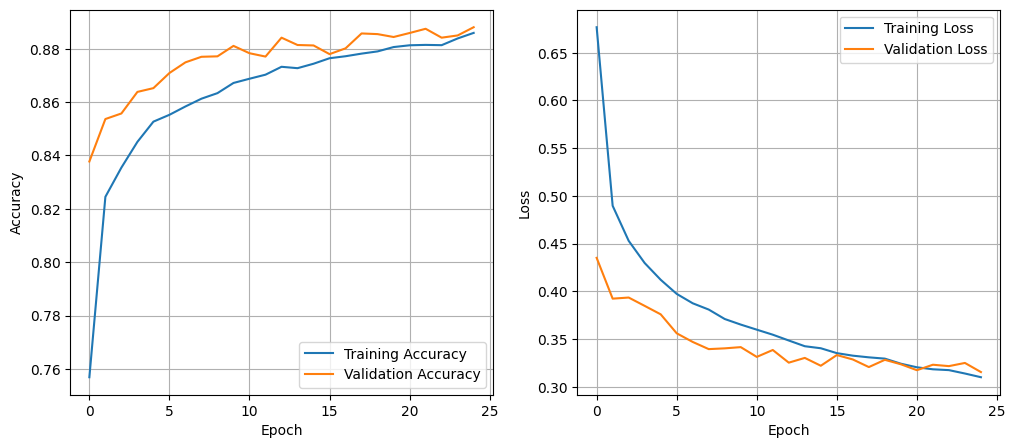

In [14]:
#@title Evaluating the ANN's training
# Evaluating the model's performance on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

# Plotting training history (accuracy and loss)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['sparse_categorical_accuracy'], label='Training Accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()




In [15]:
#@title Making predictions using model
# Making predictions on test data
predictions = model.predict(x_test)

# Convert predicted probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)



313/313 [==============================] - 1s 2ms/step


In [16]:
#@title Model Performance Statistics
# Calculating accuracy
accuracy = accuracy_score(y_test, predicted_labels)
print("Test Accuracy:", accuracy)

# Generating a classification report
class_report = classification_report(y_test, predicted_labels)
print("Classification Report:\n", class_report)



Test Accuracy: 0.8803
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.80      0.78      0.79      1000
           3       0.86      0.91      0.89      1000
           4       0.77      0.82      0.80      1000
           5       0.99      0.94      0.97      1000
           6       0.71      0.65      0.68      1000
           7       0.91      0.98      0.94      1000
           8       0.96      0.98      0.97      1000
           9       0.97      0.94      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



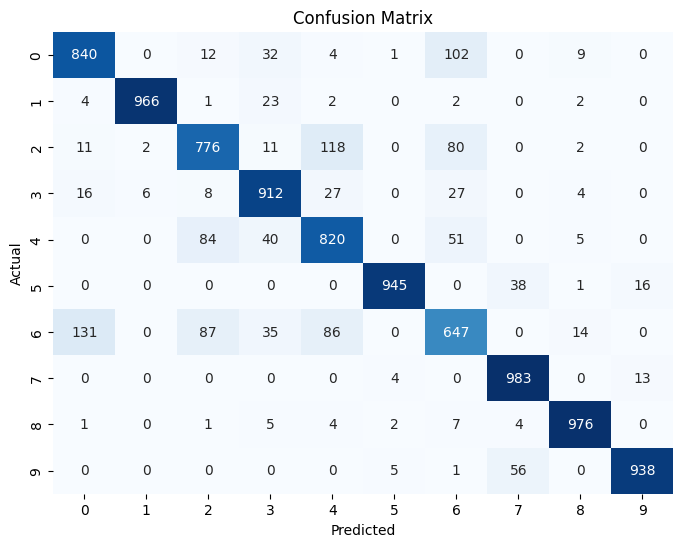

In [17]:
#@title Creating a Confusion Matrix to Show ANN's Performance
# Generating a confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_labels)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



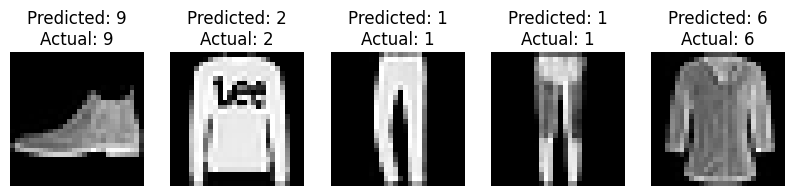

In [18]:
#@title Displaying some of the test images and their predicted labels
num_samples = 5
plt.figure(figsize=(10, 20))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}\nActual: {y_test[i]}")
    plt.axis('off')
plt.show()
